In [51]:
import pandas as pd

# Lecture du fichier CSV
df = pd.read_csv("stade_de_reims_2023_2024.csv")  # ajuste le chemin si besoin

# Aperçu des données
print("Aperçu des 5 premières lignes :")
print(df.head())

# Informations générales
print("\nInfos générales sur les colonnes :")
print(df.info())

# Statistiques globales
print("\nStatistiques descriptives :")
print(df.describe())

Aperçu des 5 premières lignes :
             Joueur            Poste  Matchs_joués  Buts  Passes_décisives  \
0    Keito Nakamura        Attaquant            32    11                 2   
1         Junya Ito  Milieu offensif            32     3                 3   
2     Yehvann Diouf          Gardien            33     0                 0   
3  Marshall Munetsi  Milieu défensif            31     5                 3   
4       Teddy Teuma   Milieu central            29     4                 4   

   Minutes_jouées  Tirs_cadrés  Cartons_jaunes  
0            2450           18               1  
1            2600           10               2  
2            2970            0               0  
3            2750           12               6  
4            2400           11               4  

Infos générales sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            

In [52]:
# Trier les joueurs par nombre de buts (du + grand au + petit)
top_buteurs = df.sort_values(by="Buts", ascending=False)

# Afficher le classement
print("Classement des meilleurs buteurs :")
print(top_buteurs[["Joueur", "Buts"]])

Classement des meilleurs buteurs :
             Joueur  Buts
0    Keito Nakamura    11
7       Reda Khadra     6
3  Marshall Munetsi     5
4       Teddy Teuma     4
1         Junya Ito     3
5   Amir Richardson     2
2     Yehvann Diouf     0
6  Thibault De Smet     0


/var/folders/6y/qt0rwdps3qx0p1zbl8y7d9ym0000gn/T/ipykernel_3437/3200936347.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_buteurs, x="Buts", y="Joueur", palette="Reds_r")


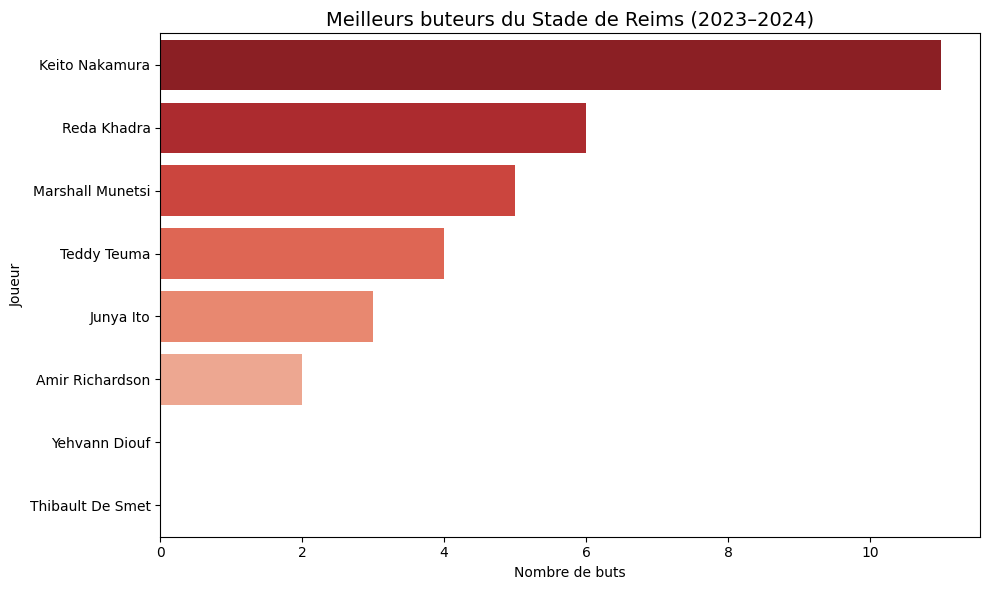

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tri des joueurs par buts (encore une fois pour le graphique)
top_buteurs = df.sort_values(by="Buts", ascending=False)

# Taille de la figure
plt.figure(figsize=(10, 6))

# Création du barplot
sns.barplot(data=top_buteurs, x="Buts", y="Joueur", palette="Reds_r")

# Titre et labels
plt.title("Meilleurs buteurs du Stade de Reims (2023–2024)", fontsize=14)
plt.xlabel("Nombre de buts")
plt.ylabel("Joueur")

# Affichage
plt.tight_layout()
plt.show()

In [54]:
# Créer une nouvelle colonne "buts par 90 minutes"
df["Buts_par_90"] = (df["Buts"] / df["Minutes_jouées"]) * 90

# Trier par efficacité offensive
buteurs_efficaces = df.sort_values(by="Buts_par_90", ascending=False)

# Affichage
print("Classement par efficacité offensive (buts / 90 min) :")
print(buteurs_efficaces[["Joueur", "Buts", "Minutes_jouées", "Buts_par_90"]])


#Interprétation :
	#•	> 0.5 : joueur très efficace (presque 1 but tous les 2 matchs)
	#•	~0.3–0.4 : bon finisseur
	#•	< 0.2 : joueur qui marque peu ou joue à un autre poste

Classement par efficacité offensive (buts / 90 min) :
             Joueur  Buts  Minutes_jouées  Buts_par_90
0    Keito Nakamura    11            2450     0.404082
7       Reda Khadra     6            1900     0.284211
3  Marshall Munetsi     5            2750     0.163636
4       Teddy Teuma     4            2400     0.150000
1         Junya Ito     3            2600     0.103846
5   Amir Richardson     2            2300     0.078261
2     Yehvann Diouf     0            2970     0.000000
6  Thibault De Smet     0            2100     0.000000


In [55]:
# Nouvelle colonne : passes décisives par 90 minutes
df["Passes_par_90"] = (df["Passes_décisives"] / df["Minutes_jouées"]) * 90

# Trier les joueurs les plus efficaces en passes
passeurs = df.sort_values(by="Passes_par_90", ascending=False)

# Affichage
print("Classement par efficacité en passes décisives (passes / 90 min) :")
print(passeurs[["Joueur", "Passes_décisives", "Minutes_jouées", "Passes_par_90"]])

Classement par efficacité en passes décisives (passes / 90 min) :
             Joueur  Passes_décisives  Minutes_jouées  Passes_par_90
4       Teddy Teuma                 4            2400       0.150000
1         Junya Ito                 3            2600       0.103846
3  Marshall Munetsi                 3            2750       0.098182
7       Reda Khadra                 2            1900       0.094737
5   Amir Richardson                 2            2300       0.078261
0    Keito Nakamura                 2            2450       0.073469
6  Thibault De Smet                 1            2100       0.042857
2     Yehvann Diouf                 0            2970       0.000000


In [56]:
# Nouvelle colonne : contributions offensives par 90 minutes
df["Contribution_totale_par_90"] = df["Buts_par_90"] + df["Passes_par_90"]

# Tri du classement
contributeurs = df.sort_values(by="Contribution_totale_par_90", ascending=False)

# Affichage
print("Classement des joueurs les plus décisifs (buts + passes par 90min) :")
print(contributeurs[["Joueur", "Buts", "Passes_décisives", "Contribution_totale_par_90"]])

Classement des joueurs les plus décisifs (buts + passes par 90min) :
             Joueur  Buts  Passes_décisives  Contribution_totale_par_90
0    Keito Nakamura    11                 2                    0.477551
7       Reda Khadra     6                 2                    0.378947
4       Teddy Teuma     4                 4                    0.300000
3  Marshall Munetsi     5                 3                    0.261818
1         Junya Ito     3                 3                    0.207692
5   Amir Richardson     2                 2                    0.156522
6  Thibault De Smet     0                 1                    0.042857
2     Yehvann Diouf     0                 0                    0.000000


/var/folders/6y/qt0rwdps3qx0p1zbl8y7d9ym0000gn/T/ipykernel_3437/857817496.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


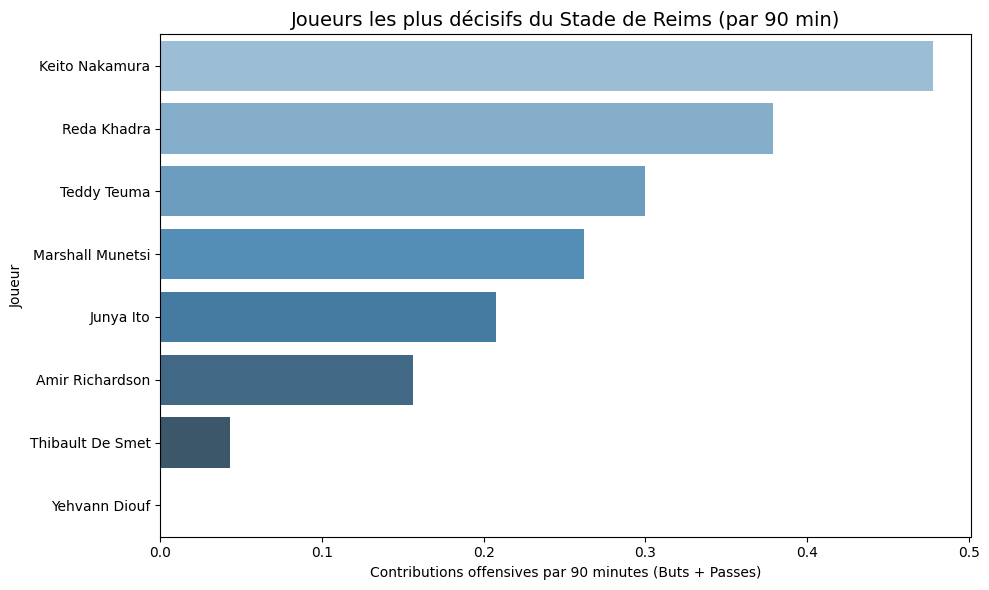

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tri des joueurs les plus décisifs
contributeurs = df.sort_values(by="Contribution_totale_par_90", ascending=False)

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(
    data=contributeurs,
    x="Contribution_totale_par_90",
    y="Joueur",
    palette="Blues_d"
)

# Titre et labels
plt.title("Joueurs les plus décisifs du Stade de Reims (par 90 min)", fontsize=14)
plt.xlabel("Contributions offensives par 90 minutes (Buts + Passes)")
plt.ylabel("Joueur")

# Affichage
plt.tight_layout()
plt.show()

In [58]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.transfermarkt.fr/ligue-2/marktwerte/wettbewerb/FR2"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

noms = []
postes = []

rows = soup.select("table.items tbody tr")

for row in rows:
    try:
        sous_table = row.select_one("table.inline-table")
        if sous_table:
            infos = sous_table.select("tr")
            nom = infos[0].select_one("td.hauptlink a").text.strip()
            poste = infos[1].select_one("td").text.strip()
            
            noms.append(nom)
            postes.append(poste)
    except Exception as e:
        continue

# Création du DataFrame
joueurs = pd.DataFrame({
    "Nom": noms,
    "Poste": postes
})

print(joueurs.head(25))

                    Nom              Poste
0         Lucas Stassin       Avant-centre
1   Zuriko Davitashvili      Ailier gauche
2        Keito Nakamura      Ailier gauche
3         Sergio Akieme     Arrière gauche
4          Pierre Ekwah    Milieu défensif
5          Joseph Okumu  Défenseur central
6        Becir Omeragic  Défenseur central
7        Mohamed Daramy      Ailier gauche
8            Mory Gbane    Milieu défensif
9           Yaya Fofana     Milieu central
10       Yasser Larouci     Arrière gauche
11         Enzo Bardeli     Milieu central
12   Gautier Larsonneur     Gardien de but
13        João Ferreira      Arrière droit
14          Chico Lamba  Défenseur central
15          Teddy Teuma     Milieu central
16           Théo Leoni     Milieu central
17         Khalil Fayad     Milieu central
18      Paul Bernardoni     Gardien de but
19        Irvin Cardona       Avant-centre
20       Aïmen Moueffek     Milieu central
21     Augustine Boakye       Ailier droit
22       Eb

In [59]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.transfermarkt.fr/ligue-2/marktwerte/wettbewerb/FR2"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

noms, postes, ages, clubs, valeurs = [], [], [], [], []

rows = soup.select("table.items tbody tr")

for row in rows:
    try:
        # Nom + Poste
        sous_table = row.select_one("table.inline-table")
        if not sous_table:
            continue

        lignes = sous_table.select("tr")
        nom = lignes[0].select_one("td.hauptlink a").text.strip()
        poste = lignes[1].select_one("td").text.strip()

        # Age
        td_zentriert = row.find_all("td", class_="zentriert")
        age = td_zentriert[1].text.strip() if len(td_zentriert) > 1 else ""

        # Club
        club_tag = row.select_one(".inline-table .vereinprofil_tooltip")
        club = club_tag.text.strip() if club_tag else ""

        # Valeur marchande
        td_valeur = row.select_one("td.rechts.hauptlink")
        valeur = td_valeur.text.strip() if td_valeur else ""

        # Ajout
        noms.append(nom)
        postes.append(poste)
        ages.append(age)
        clubs.append(club)
        valeurs.append(valeur)

    except Exception as e:
        print(f"Erreur sur une ligne : {e}")
        continue

# Création du DataFrame
joueurs = pd.DataFrame({
    "Nom": noms,
    "Poste": postes,
    "Age": ages,
    "Club": clubs,
    "Valeur marchande": valeurs
})

print(joueurs.head(10))

                   Nom              Poste Age Club Valeur marchande
0        Lucas Stassin       Avant-centre              18,00 mio. €
1  Zuriko Davitashvili      Ailier gauche              10,00 mio. €
2       Keito Nakamura      Ailier gauche               8,00 mio. €
3        Sergio Akieme     Arrière gauche               7,00 mio. €
4         Pierre Ekwah    Milieu défensif               7,00 mio. €
5         Joseph Okumu  Défenseur central               7,00 mio. €
6       Becir Omeragic  Défenseur central               4,50 mio. €
7       Mohamed Daramy      Ailier gauche               4,00 mio. €
8           Mory Gbane    Milieu défensif               4,00 mio. €
9          Yaya Fofana     Milieu central               4,00 mio. €


In [60]:
def convertir_valeur(val):
    val = val.replace("€", "").replace("mio.", "").strip()
    val = val.replace(",", ".")
    try:
        return int(float(val) * 1_000_000)
    except:
        return None

# Appliquer la conversion
joueurs["Valeur (€)"] = joueurs["Valeur marchande"].apply(convertir_valeur)

In [61]:
pepites = joueurs[joueurs["Valeur (€)"] <= 3_000_000]
print(pepites[["Nom", "Poste", "Club", "Valeur (€)"]])

                   Nom              Poste Club  Valeur (€)
12  Gautier Larsonneur     Gardien de but        3000000.0
13       João Ferreira      Arrière droit        3000000.0
14         Chico Lamba  Défenseur central        3000000.0
15         Teddy Teuma     Milieu central        3000000.0
16          Théo Leoni     Milieu central        3000000.0
17        Khalil Fayad     Milieu central        3000000.0
18     Paul Bernardoni     Gardien de but        2800000.0
19       Irvin Cardona       Avant-centre        2500000.0
20      Aïmen Moueffek     Milieu central        2500000.0
21    Augustine Boakye       Ailier droit        2500000.0
22      Ebenezer Annan     Arrière gauche        2500000.0
23         Amine Hemia    Milieu offensif        2500000.0
24       Téji Savanier    Milieu offensif        2500000.0
26  Naoufel El Hannach  Défenseur central        1000000.0


In [62]:
pepites = pepites.sort_values(by="Valeur (€)", ascending=True)

In [63]:
milieux = joueurs[joueurs["Poste"].str.contains("Milieu", case=False)]

In [64]:
print(milieux[["Nom", "Poste", "Club", "Valeur (€)"]])

                Nom            Poste Club  Valeur (€)
4      Pierre Ekwah  Milieu défensif        7000000.0
8        Mory Gbane  Milieu défensif        4000000.0
9       Yaya Fofana   Milieu central        4000000.0
11     Enzo Bardeli   Milieu central        3500000.0
15      Teddy Teuma   Milieu central        3000000.0
16       Théo Leoni   Milieu central        3000000.0
17     Khalil Fayad   Milieu central        3000000.0
20   Aïmen Moueffek   Milieu central        2500000.0
23      Amine Hemia  Milieu offensif        2500000.0
24    Téji Savanier  Milieu offensif        2500000.0
29  Nadir El Jamali  Milieu offensif              NaN


In [65]:
joueurs["Age"] = pd.to_numeric(joueurs["Age"], errors="coerce")

In [66]:
pepites = joueurs[
    (joueurs["Age"] <= 21) &
    (joueurs["Valeur (€)"] <= 3_000_000)
].sort_values(by="Valeur (€)")

In [67]:
# 📊 Objectif : Scraper les joueurs de Ligue 2 avec leur poste, âge, club et valeur marchande depuis Transfermarkt

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

url = "https://www.transfermarkt.fr/ligue-2/marktwerte/wettbewerb/FR2"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

noms, postes, clubs, valeurs, liens, ages = [], [], [], [], [], []

rows = soup.select("table.items tbody tr")

for row in rows:
    try:
        sous_table = row.select_one("table.inline-table")
        if not sous_table:
            continue

        lignes = sous_table.select("tr")
        nom_tag = lignes[0].select_one("td.hauptlink a")
        nom = nom_tag.text.strip()
        lien = "https://www.transfermarkt.fr" + nom_tag.get("href")
        poste = lignes[1].select_one("td").text.strip()

        club_tag = row.select_one(".inline-table .vereinprofil_tooltip")
        club = club_tag.text.strip() if club_tag else ""

        valeur_tag = row.select_one("td.rechts.hauptlink")
        valeur = valeur_tag.text.strip() if valeur_tag else ""

        # Extraire l'âge depuis les cellules zentriert
        zentriert = row.find_all("td", class_="zentriert")
        age = None
        if len(zentriert) >= 2:
            try:
                age = int(zentriert[1].text.strip())
            except:
                age = None

        noms.append(nom)
        postes.append(poste)
        clubs.append(club)
        valeurs.append(valeur)
        liens.append(lien)
        ages.append(age)

        time.sleep(0.1)
    except Exception as e:
        continue

# Création du DataFrame final
joueurs = pd.DataFrame({
    "Nom": noms,
    "Poste": postes,
    "Club": clubs,
    "Valeur marchande": valeurs,
    "Lien": liens,
    "Age": ages
})

print(joueurs.head(10))

                   Nom              Poste Club Valeur marchande  \
0        Lucas Stassin       Avant-centre          18,00 mio. €   
1  Zuriko Davitashvili      Ailier gauche          10,00 mio. €   
2       Keito Nakamura      Ailier gauche           8,00 mio. €   
3        Sergio Akieme     Arrière gauche           7,00 mio. €   
4         Pierre Ekwah    Milieu défensif           7,00 mio. €   
5         Joseph Okumu  Défenseur central           7,00 mio. €   
6       Becir Omeragic  Défenseur central           4,50 mio. €   
7       Mohamed Daramy      Ailier gauche           4,00 mio. €   
8           Mory Gbane    Milieu défensif           4,00 mio. €   
9          Yaya Fofana     Milieu central           4,00 mio. €   

                                                Lien   Age  
0  https://www.transfermarkt.fr/lucas-stassin/pro...  None  
1  https://www.transfermarkt.fr/zuriko-davitashvi...  None  
2  https://www.transfermarkt.fr/keito-nakamura/pr...  None  
3  https://www.tra

In [68]:
import pandas as pd

# Chargement du CSV
df = pd.read_csv("pepites_transfermarkt.csv")

# Aperçu des premières lignes
print(df.head())

                      Nom           Poste  Âge            Club  \
0         Stefanos Tzimas    Avant-centre   19   1.FC Nürnberg   
1         Jobe Bellingham  Milieu central   19  AFC Sunderland   
2         Wilfried Gnonto    Ailier droit   21    Leeds United   
3  Francesco Pio Esposito    Avant-centre   19   Spezia Calcio   
4              Chris Rigg  Milieu central   17  AFC Sunderland   

  Valeur marchande  
0     22,00 mio. €  
1     22,00 mio. €  
2     18,00 mio. €  
3     17,00 mio. €  
4     16,00 mio. €  


In [69]:
def convertir_valeur(val):
    val = val.replace("€", "").replace("mio.", "").strip().replace(",", ".")
    return float(val) * 1_000_000

df["Valeur (€)"] = df["Valeur marchande"].apply(convertir_valeur)

In [70]:
pepites = df[(df["Âge"] <= 21) & (df["Valeur (€)"] <= 5_000_000)]
print(pepites.sort_values(by="Valeur (€)"))

                   Nom              Poste  Âge                       Club  \
49        Mateo Joseph       Avant-centre   21               Leeds United   
47      Gustavo Puerta     Milieu central   21                  Hull City   
46     Niccolò Fortini     Arrière gauche   19             SS Juve Stabia   
45      Min-hyeok Yang       Ailier droit   19        Queens Park Rangers   
44  Santiago Castañeda    Milieu défensif   20            SC Paderborn 07   
48       Tommaso Berti    Milieu offensif   21                  Cesena FC   
43         Livan Burcu      Ailier gauche   20             1.FC Magdeburg   
42    Rav van den Berg  Défenseur central   20           Middlesbrough FC   
41      Carlos Álvarez       Ailier droit   21                 UD Levante   
40          Abu Kamara       Ailier droit   21                  Hull City   
39      Samuele Angori     Arrière gauche   21         Pisa Sporting Club   
38         David Mella       Ailier droit   19     Deportivo de La Coruña   

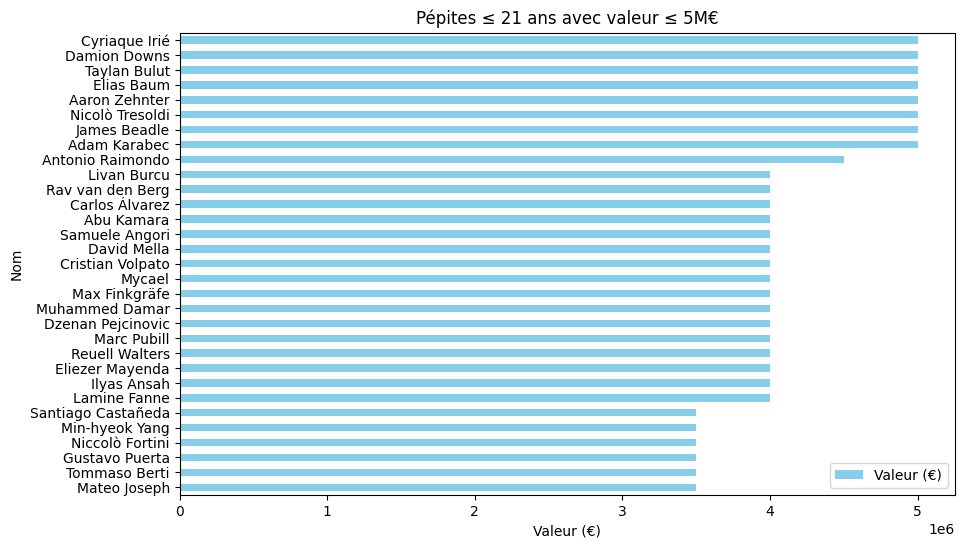

In [71]:
import matplotlib.pyplot as plt

pepites.sort_values(by="Valeur (€)", ascending=False).plot(
    kind="barh", x="Nom", y="Valeur (€)", figsize=(10, 6), color="skyblue")
plt.title("Pépites ≤ 21 ans avec valeur ≤ 5M€")
plt.xlabel("Valeur (€)")
plt.gca().invert_yaxis()
plt.show()

In [72]:
# Supposons que tu as déjà lu le fichier :
df = pd.read_csv("pepites_transfermarkt.csv")

# Nettoyage de la valeur marchande
def convertir_valeur(val):
    val = val.replace("€", "").replace("mio.", "").strip().replace(",", ".")
    return float(val) * 1_000_000

df["Valeur (€)"] = df["Valeur marchande"].apply(convertir_valeur)

# Filtrer uniquement les défenseurs
defenseurs = df[df["Poste"].str.contains("défenseur|arrière", case=False)]

# Et si tu veux uniquement les jeunes pépites ≤ 21 ans
pepites_defenseurs = defenseurs[
    (defenseurs["Âge"] <= 21) & (defenseurs["Valeur (€)"] <= 5_000_000)
]

print(pepites_defenseurs[["Nom", "Poste", "Âge", "Club", "Valeur (€)"]])

                 Nom              Poste  Âge                Club  Valeur (€)
21      Taylan Bulut      Arrière droit   18       FC Schalke 04   5000000.0
22        Elias Baum      Arrière droit   19    SV 07 Elversberg   5000000.0
31    Reuell Walters      Arrière droit   20          Luton Town   4000000.0
32       Marc Pubill      Arrière droit   21          UD Almería   4000000.0
34     Max Finkgräfe     Arrière gauche   21           1.FC Köln   4000000.0
39    Samuele Angori     Arrière gauche   21  Pisa Sporting Club   4000000.0
42  Rav van den Berg  Défenseur central   20    Middlesbrough FC   4000000.0
46   Niccolò Fortini     Arrière gauche   19      SS Juve Stabia   3500000.0


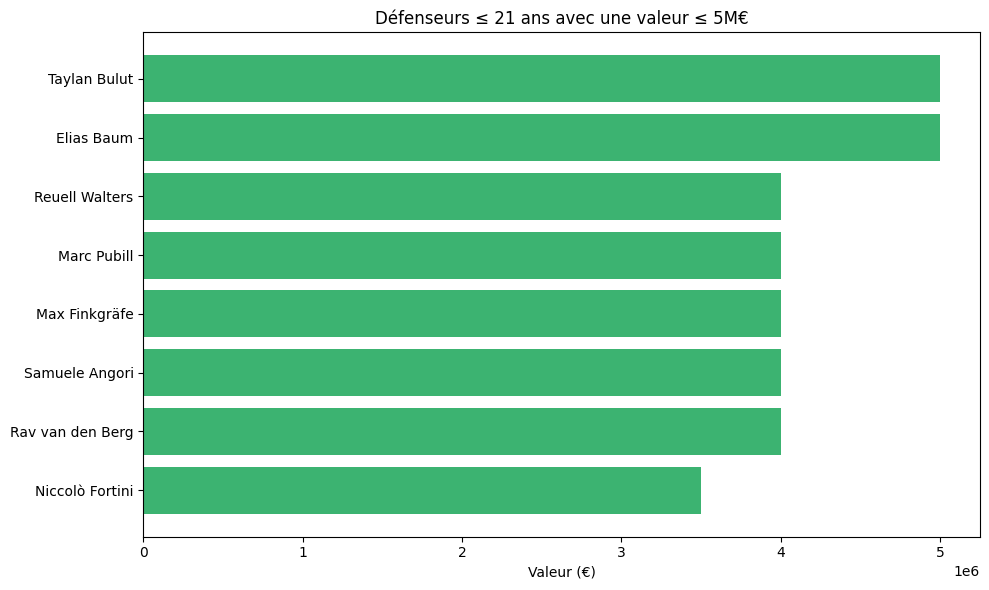

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier CSV
df = pd.read_csv("pepites_transfermarkt.csv")

# Conversion de la valeur marchande en euros
def convertir_valeur(val):
    val = val.replace("€", "").replace("mio.", "").strip().replace(",", ".")
    return float(val) * 1_000_000

df["Valeur (€)"] = df["Valeur marchande"].apply(convertir_valeur)

# Filtrer les défenseurs jeunes et pas chers
pepites_def = df[
    df["Poste"].str.contains("défenseur|arrière", case=False) &
    (df["Âge"] <= 21) &
    (df["Valeur (€)"] <= 5_000_000)
]

# Trier par valeur décroissante
pepites_def = pepites_def.sort_values(by="Valeur (€)", ascending=False)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.barh(pepites_def["Nom"], pepites_def["Valeur (€)"], color="mediumseagreen")
plt.xlabel("Valeur (€)")
plt.title("Défenseurs ≤ 21 ans avec une valeur ≤ 5M€")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

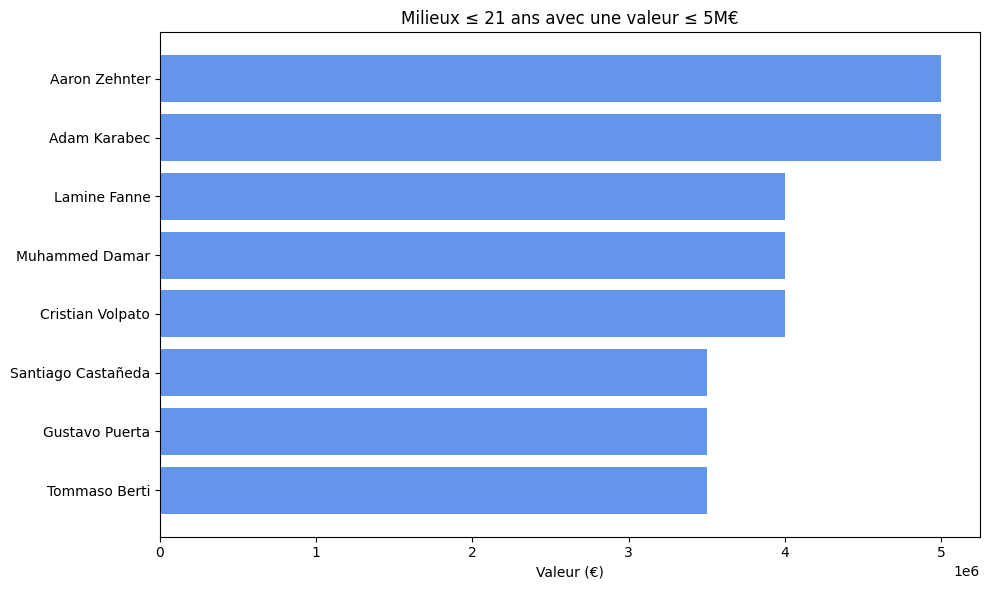

In [74]:
pepites_milieux = df[
    df["Poste"].str.contains("milieu", case=False) &
    (df["Âge"] <= 21) &
    (df["Valeur (€)"] <= 5_000_000)
].sort_values(by="Valeur (€)", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(pepites_milieux["Nom"], pepites_milieux["Valeur (€)"], color="cornflowerblue")
plt.xlabel("Valeur (€)")
plt.title("Milieux ≤ 21 ans avec une valeur ≤ 5M€")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

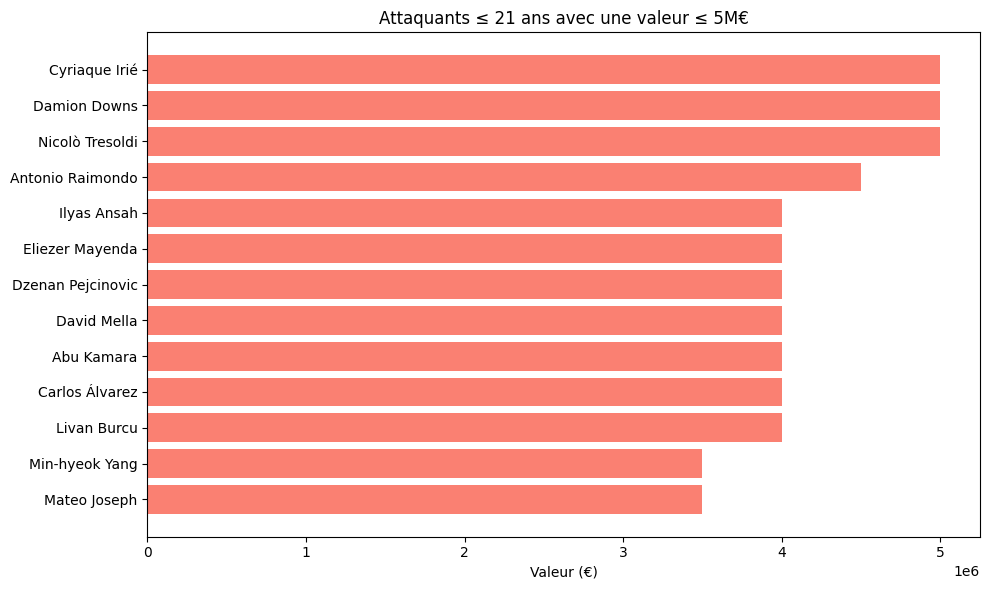

In [75]:
pepites_attaquants = df[
    df["Poste"].str.contains("attaquant|avant-centre|ailier", case=False) &
    (df["Âge"] <= 21) &
    (df["Valeur (€)"] <= 5_000_000)
].sort_values(by="Valeur (€)", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(pepites_attaquants["Nom"], pepites_attaquants["Valeur (€)"], color="salmon")
plt.xlabel("Valeur (€)")
plt.title("Attaquants ≤ 21 ans avec une valeur ≤ 5M€")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()